# Experiment No: 3
### **Aim:** To perform statistical and correlation analysis on the Spambase dataset to identify relationships between features and the target class.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo

# Fetch the dataset
spambase = fetch_ucirepo(id=94)
X = spambase.data.features
y = spambase.data.targets

# Combine into a single DataFrame
df = pd.concat([X, y], axis=1)
print("Dataset loaded for statistical analysis.")

Dataset loaded for statistical analysis.


In [2]:
print("--- Advanced Statistical Summary ---")

# 1. Broad Statistics (Required: describe, mean, median, std)
stats_summary = df.describe().T
stats_summary['median'] = df.median(numeric_only=True)
stats_summary['variance'] = df.var(numeric_only=True)

print("Key statistics for the first 10 features:")
display(stats_summary[['mean', 'median', 'std', 'variance']].head(10))

# 2. Grouped Statistics (Required: groupby)
# This shows how feature averages differ between Spam (1) and Not Spam (0)
print("\nMean Feature Values Grouped by Class (Top 5 features):")
grouped_stats = df.groupby('Class').mean()
display(grouped_stats.iloc[:, :5])

--- Advanced Statistical Summary ---
Key statistics for the first 10 features:


,mean,median,std,variance
word_freq_make,0.104553,0.0,0.305358,0.093243
word_freq_address,0.213015,0.0,1.290575,1.665584
word_freq_all,0.280656,0.0,0.504143,0.254160
word_freq_3d,0.065425,0.0,1.395151,1.946447
word_freq_our,0.312223,0.0,0.672513,0.452273
word_freq_over,0.095901,0.0,0.273824,0.074980
word_freq_remove,0.114208,0.0,0.391441,0.153226
word_freq_internet,0.105295,0.0,0.401071,0.160858
word_freq_order,0.090067,0.0,0.278616,0.077627
word_freq_mail,0.239413,0.0,0.644755,0.415710



Mean Feature Values Grouped by Class (Top 5 features):


,word_freq_make,word_freq_address,word_freq_all,word_freq_3d,word_freq_our
Class,,,,,
0,0.073479,0.244466,0.200581,0.000886,0.181040
1,0.152339,0.164650,0.403795,0.164672,0.513955


--- Correlation Analysis ---


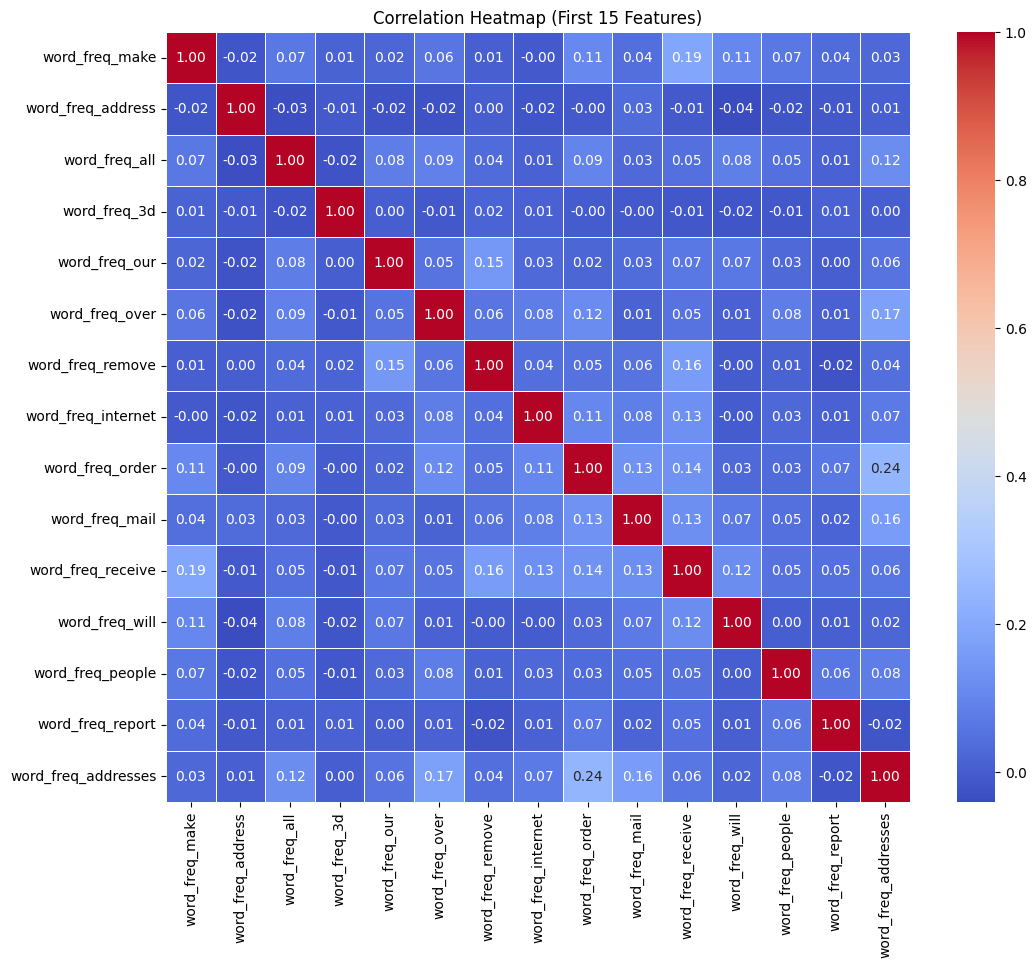


Features with highest correlation to Spam:
Class               1.000000
word_freq_your      0.383234
word_freq_000       0.334787
word_freq_remove    0.332117
char_freq_$         0.323629
word_freq_you       0.273651
Name: Class, dtype: float64


In [3]:
print("--- Correlation Analysis ---")

# 1. Calculate Correlation Matrix (Required: corr)
# We focus on the correlation of all features with the 'Class' target
corr_matrix = df.corr()

# 2. Plotting the Heatmap (Required: plot)
plt.figure(figsize=(12, 10))
# Plotting only a subset of features for readability
subset_corr = corr_matrix.iloc[:15, :15] 

sns.heatmap(subset_corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap (First 15 Features)')
plt.show()

# 3. Finding High Correlation with Target
target_corr = corr_matrix['Class'].sort_values(ascending=False)
print("\nFeatures with highest correlation to Spam:")
print(target_corr.head(6)) # Top 5 + Class itself

--- Distribution Analysis via Violin Plots ---


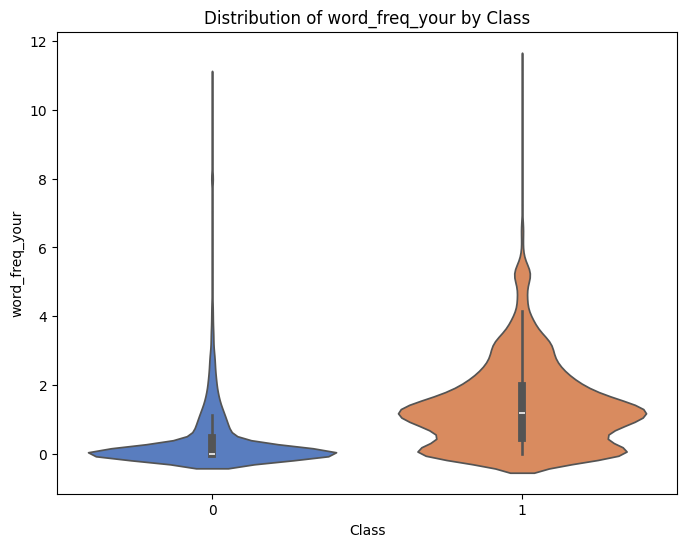

In [4]:
print("--- Distribution Analysis via Violin Plots ---")

# We pick the top correlated feature (likely 'word_freq_your' or 'word_freq_free')
top_feature = target_corr.index[1] 

plt.figure(figsize=(8, 6))
sns.violinplot(x='Class', y=top_feature, data=df, hue='Class', palette='muted', legend=False)
plt.title(f'Distribution of {top_feature} by Class')
plt.show()

### **Conclusion:**
In this lab, we successfully conducted a statistical and correlation analysis. The correlation matrix revealed which words (like 'your', 'free', and 'remove') have the strongest positive relationship with spam emails. By grouping the data, we observed clear differences in feature variances between classes, which will be critical for selecting features in the upcoming machine learning models.